# **Step 1: Install Missingno Library**

In [17]:
pip install missingno

# **Step 2: Import Libraries and Load Dataset**

In [18]:
#ount the gdrive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [19]:
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Exploratory_Data_Analysis/assignments/housing_in_london_yearly_variables.csv')
df.head()

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,18621.0,NaN,21386,18,217458.0,NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,18532.0,NaN,20911,6,260317.0,NaN,NaN,NaN,1


In [20]:
# number of missing values in each column
df.isnull().sum()

,0
code,0
area,0
date,0
median_salary,22
life_satisfaction,719
mean_salary,0
recycling_pct,211
population_size,53
number_of_jobs,140
area_size,405


# **Step 3: Applying Missingno Functions**

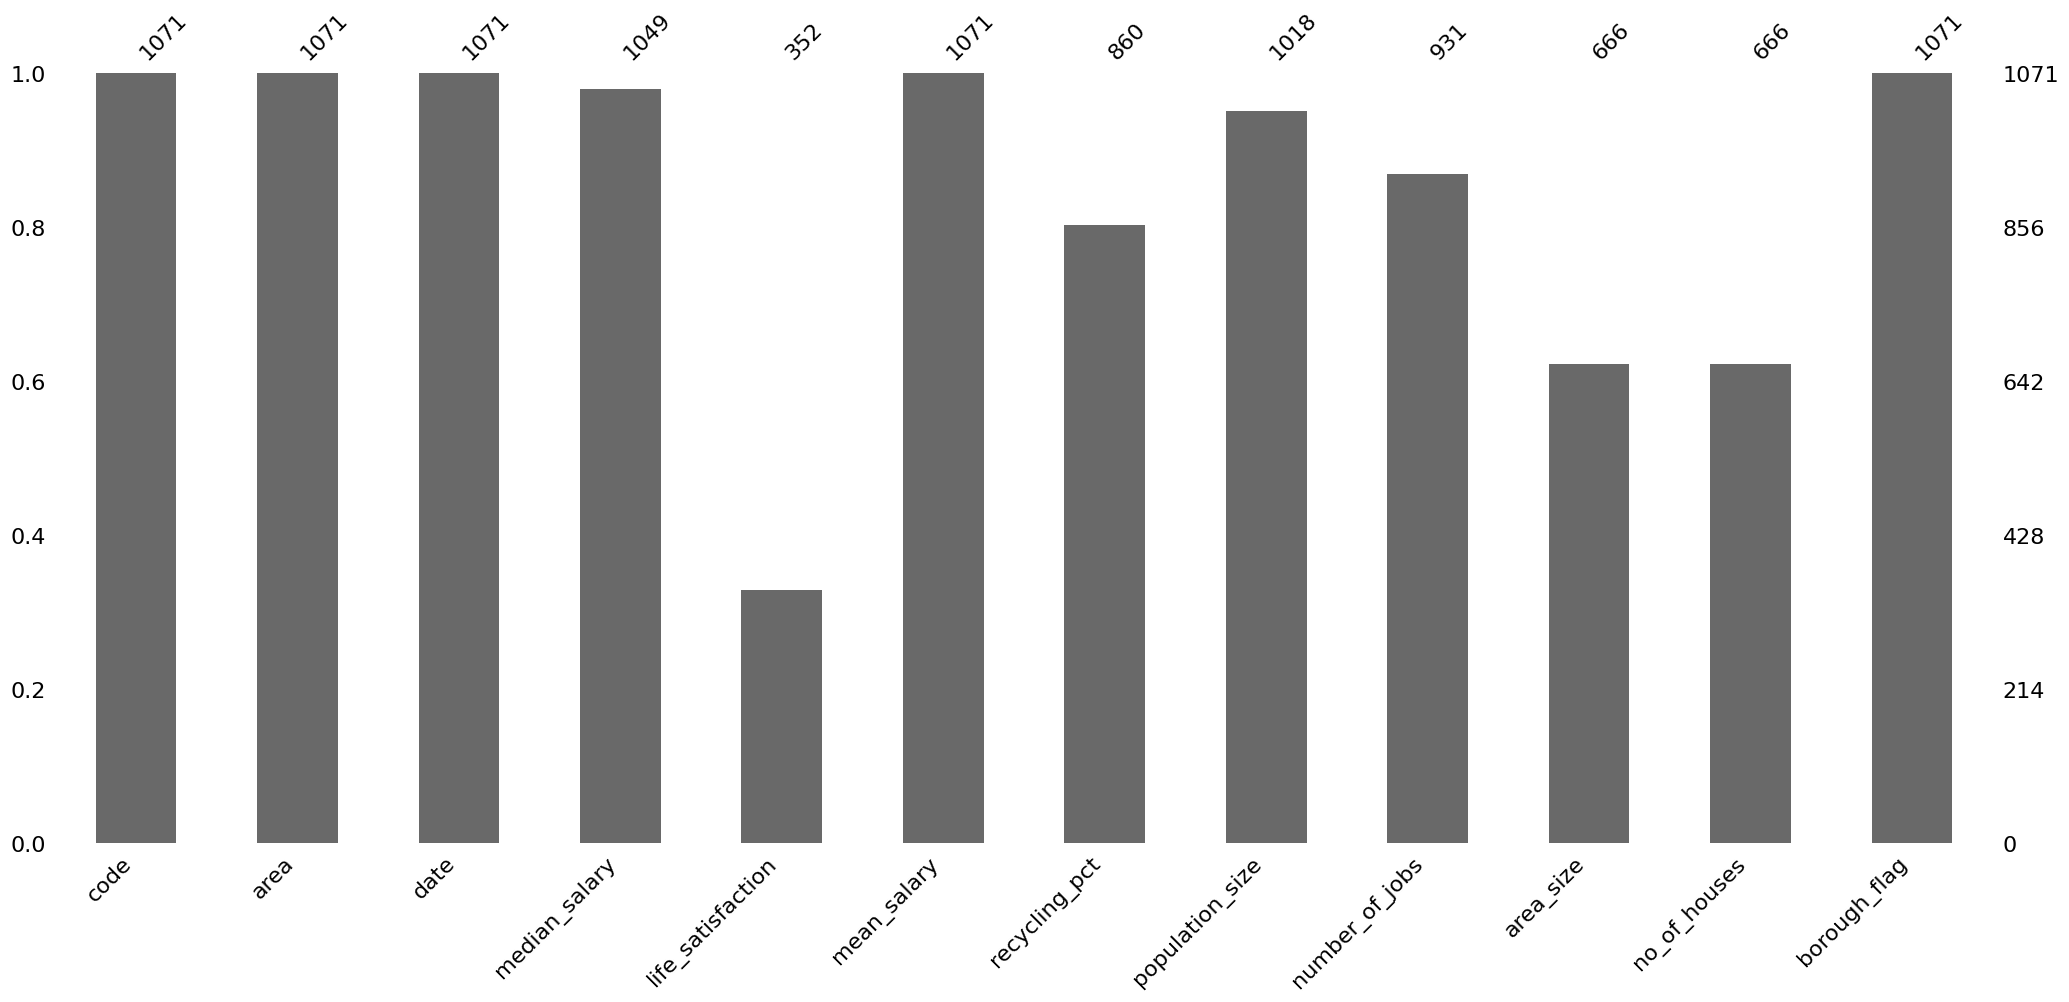

In [21]:
# Bar plot showing missing data
plt.figure(figsize=(10, 5))
msno.bar(df)
plt.show()

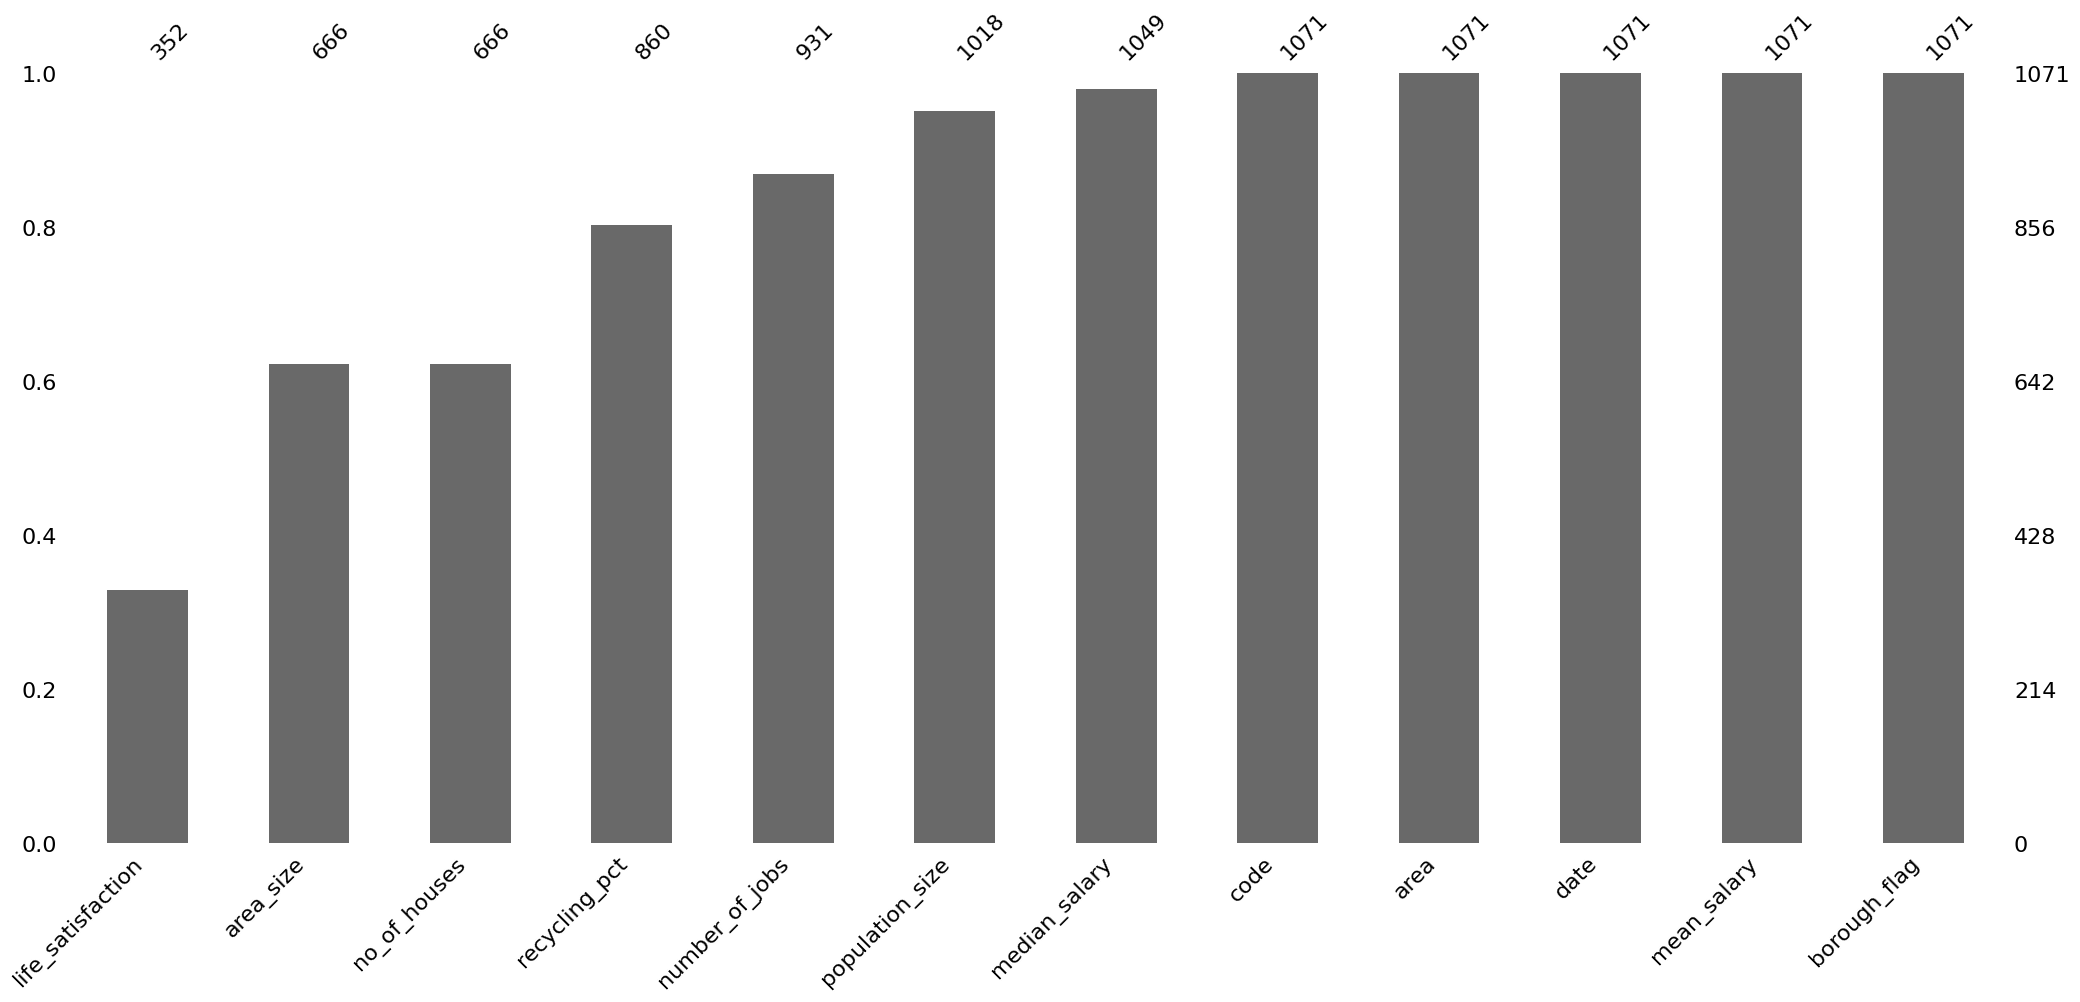

In [22]:
# Sort columns based on the percentage of missing values
df_sorted = df.loc[:, df.isnull().mean().sort_values(ascending=False).index]

# Visualize the sorted columns using a bar plot
plt.figure(figsize=(10, 5))
msno.bar(df_sorted)
plt.show()

## **OBSERVATION**

The life_satisfaction column has the highest number of missing values, while the columns code, area, date, mean_salary, and borough_flag have no missing values.

The columns arranged in decreasing order based on the number of missing values are:

life_satisfaction, area_size, no_of_houses, recycling_pct, number_of_jobs, population_size, median_salary, code, area, date, mean_salary, borough_flag.

However, using a bar plot, we cannot determine the type of missing values.

<Figure size 1000x500 with 0 Axes>

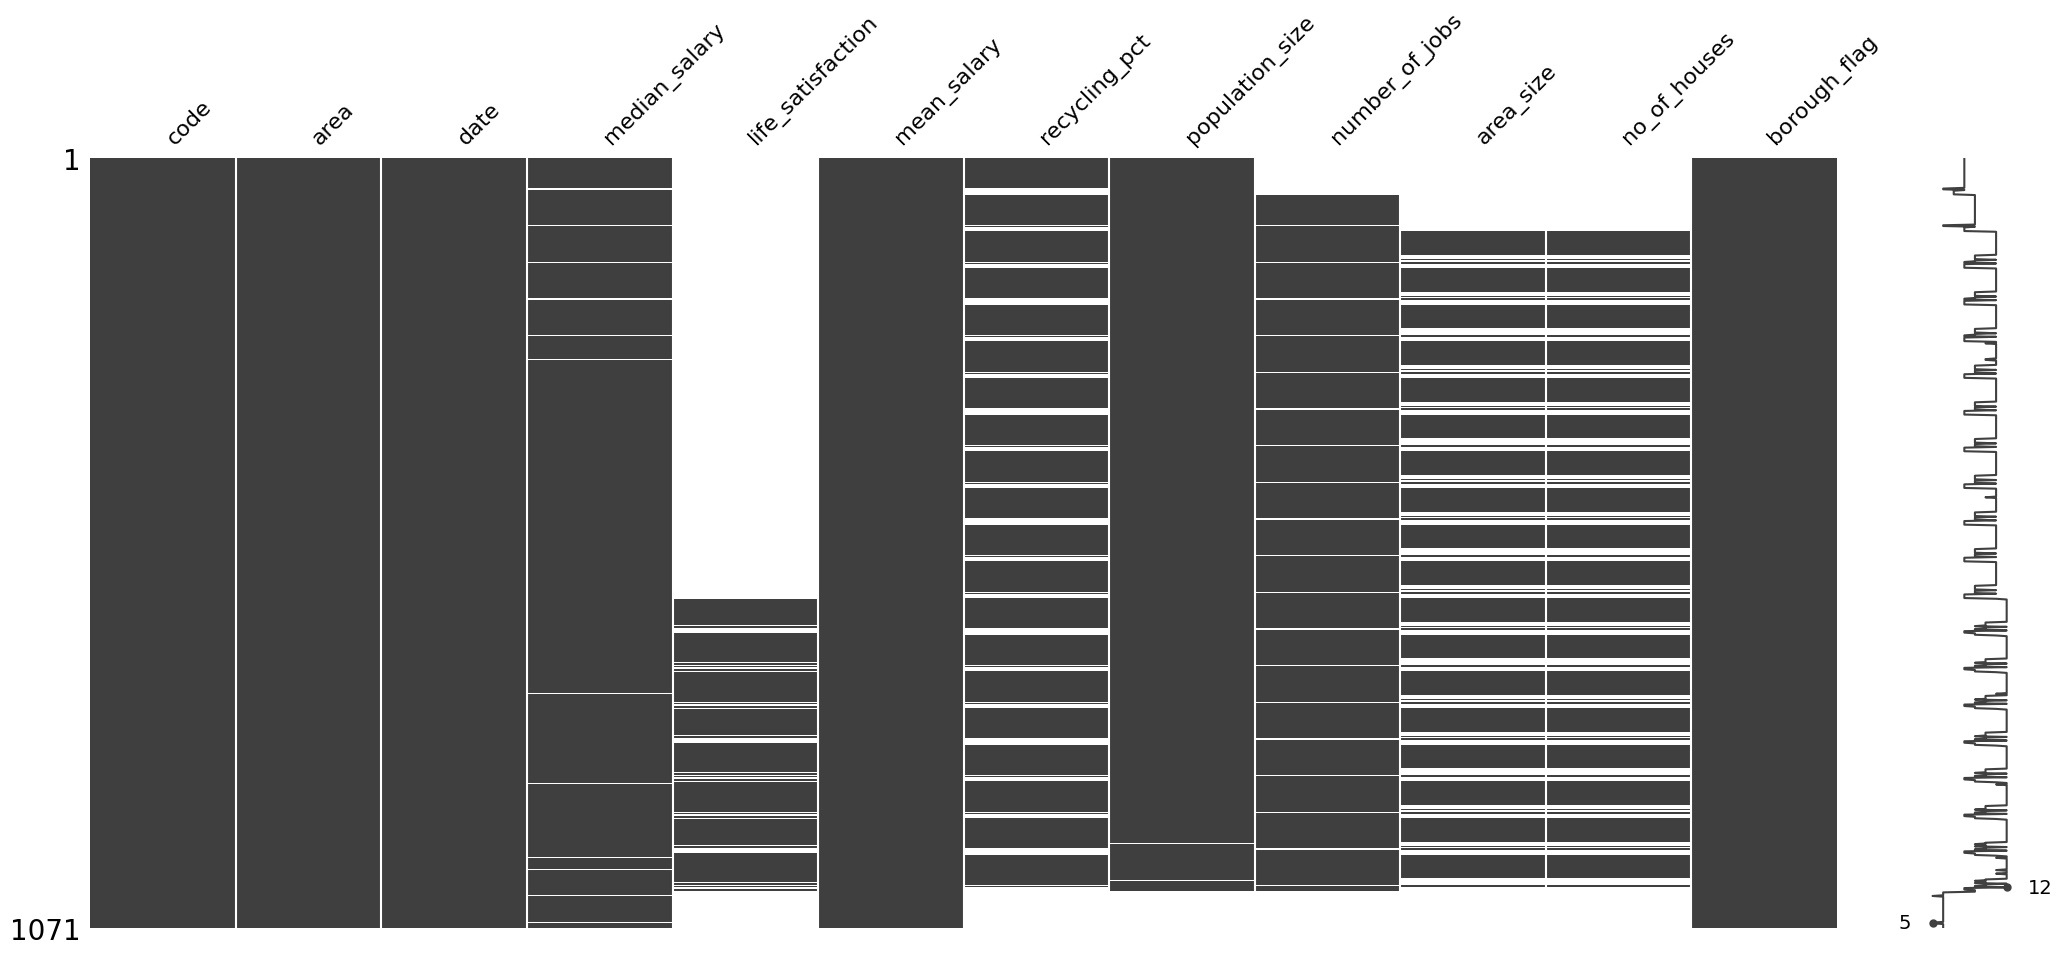

In [23]:
# Matrix plot
plt.figure(figsize=(10, 5))
msno.matrix(df)
plt.show()

## **OBSERVATION**

As observed, the white portions in the matrix plot correspond to missing values. Therefore, the number of missing values is directly proportional to the extent of white space. Based on this observation, the columns can be arranged in decreasing order of the white portion (missing values) as follows:

life_satisfaction, area_size, no_of_houses, recycling_pct, number_of_jobs, population_size, median_salary, code, area, date, mean_salary, borough_flag.

However, using the matrix plot, we cannot determine the type of missing values.

<Figure size 1000x500 with 0 Axes>

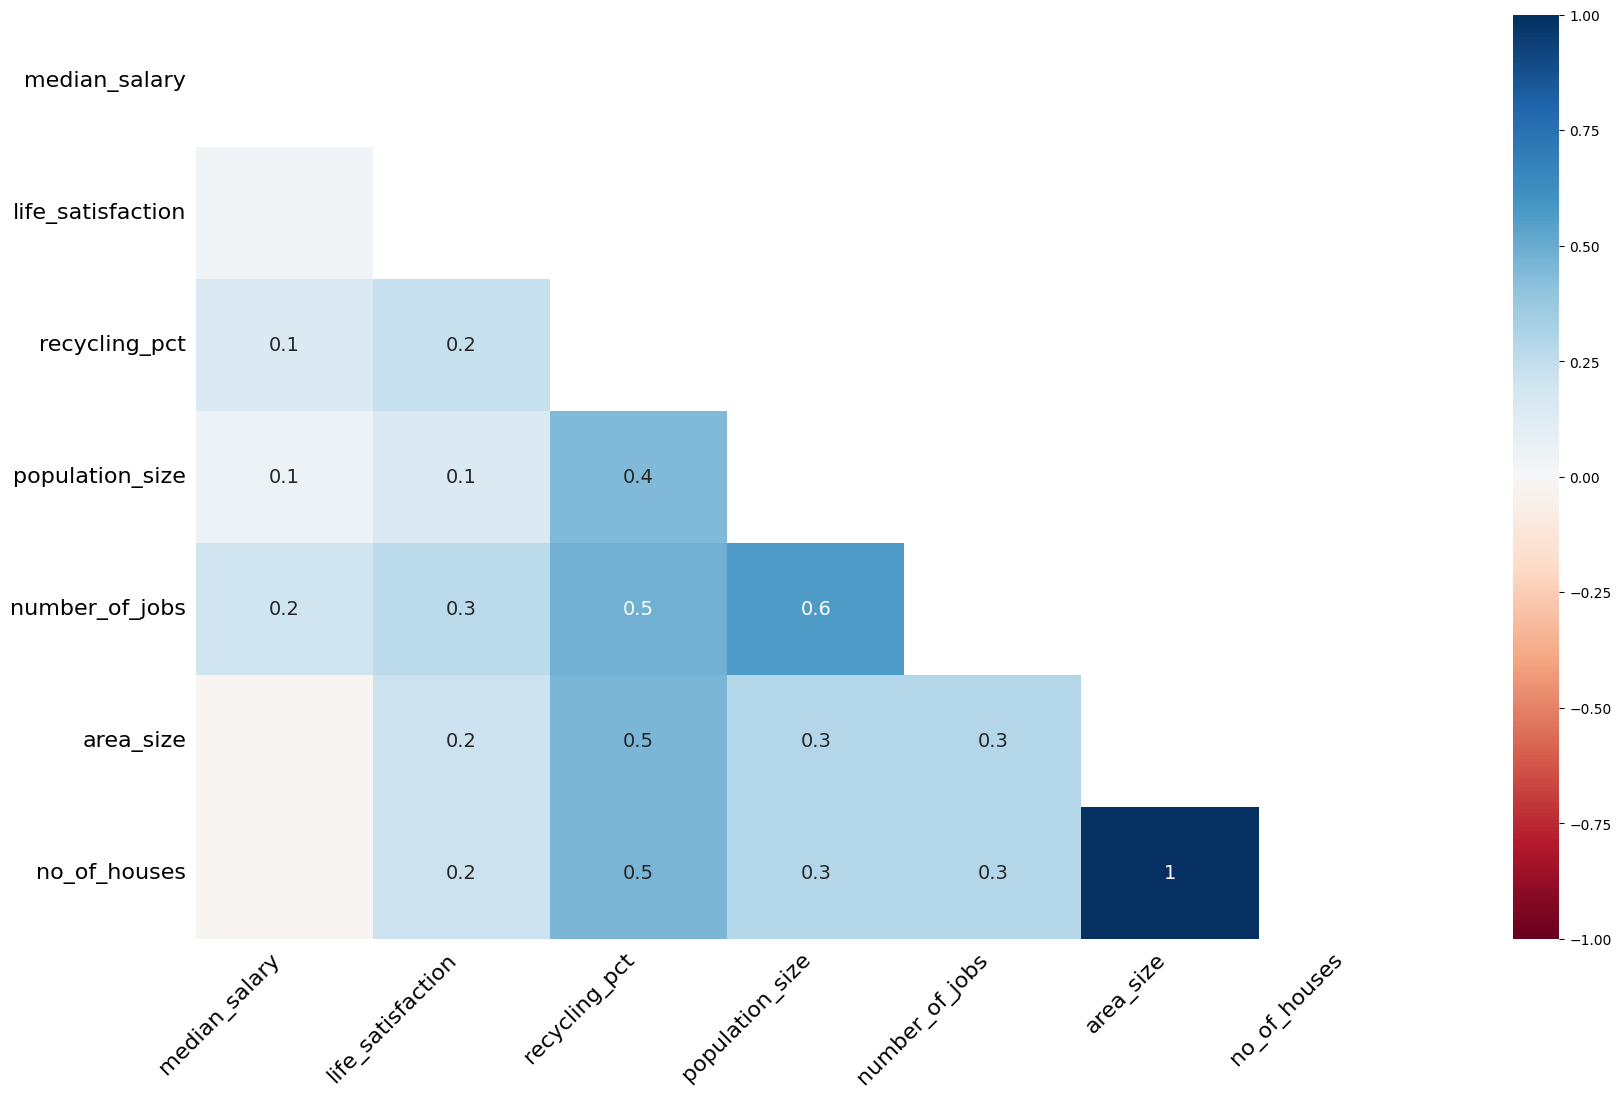

In [24]:
# Heatmap to check nullity correlations
plt.figure(figsize=(10, 5))
msno.heatmap(df)
plt.show()

## **OBSERVATION**
For median_salary and life_satisfaction, all correlation nullity values are less than or equal to 0.3. This suggests that these variables may be of the MCAR (Missing Completely at Random) type. If the missingness in one column is unrelated to the missingness in other columns, the correlation between them should be near zero. This indicates that the missing data is likely completely random and not dependent on any observed variables.

On the other hand, recycling_pct, population_size, area_size, number_of_jobs, and number_of_houses have correlation nullity values greater than 0.3 with at least one other variable, suggesting that they may be of the MAR (Missing at Random) type. If two columns have a moderate to high positive correlation, it means that the missingness in one column is likely related to the missingness in the other. This implies that the data is MAR because the missing values in one column can be explained by the values in another column.

Additionally, the correlation between area_size and no_of_houses is 1, which confirms that the missing values in these variables are likely MAR.

<Figure size 1000x500 with 0 Axes>

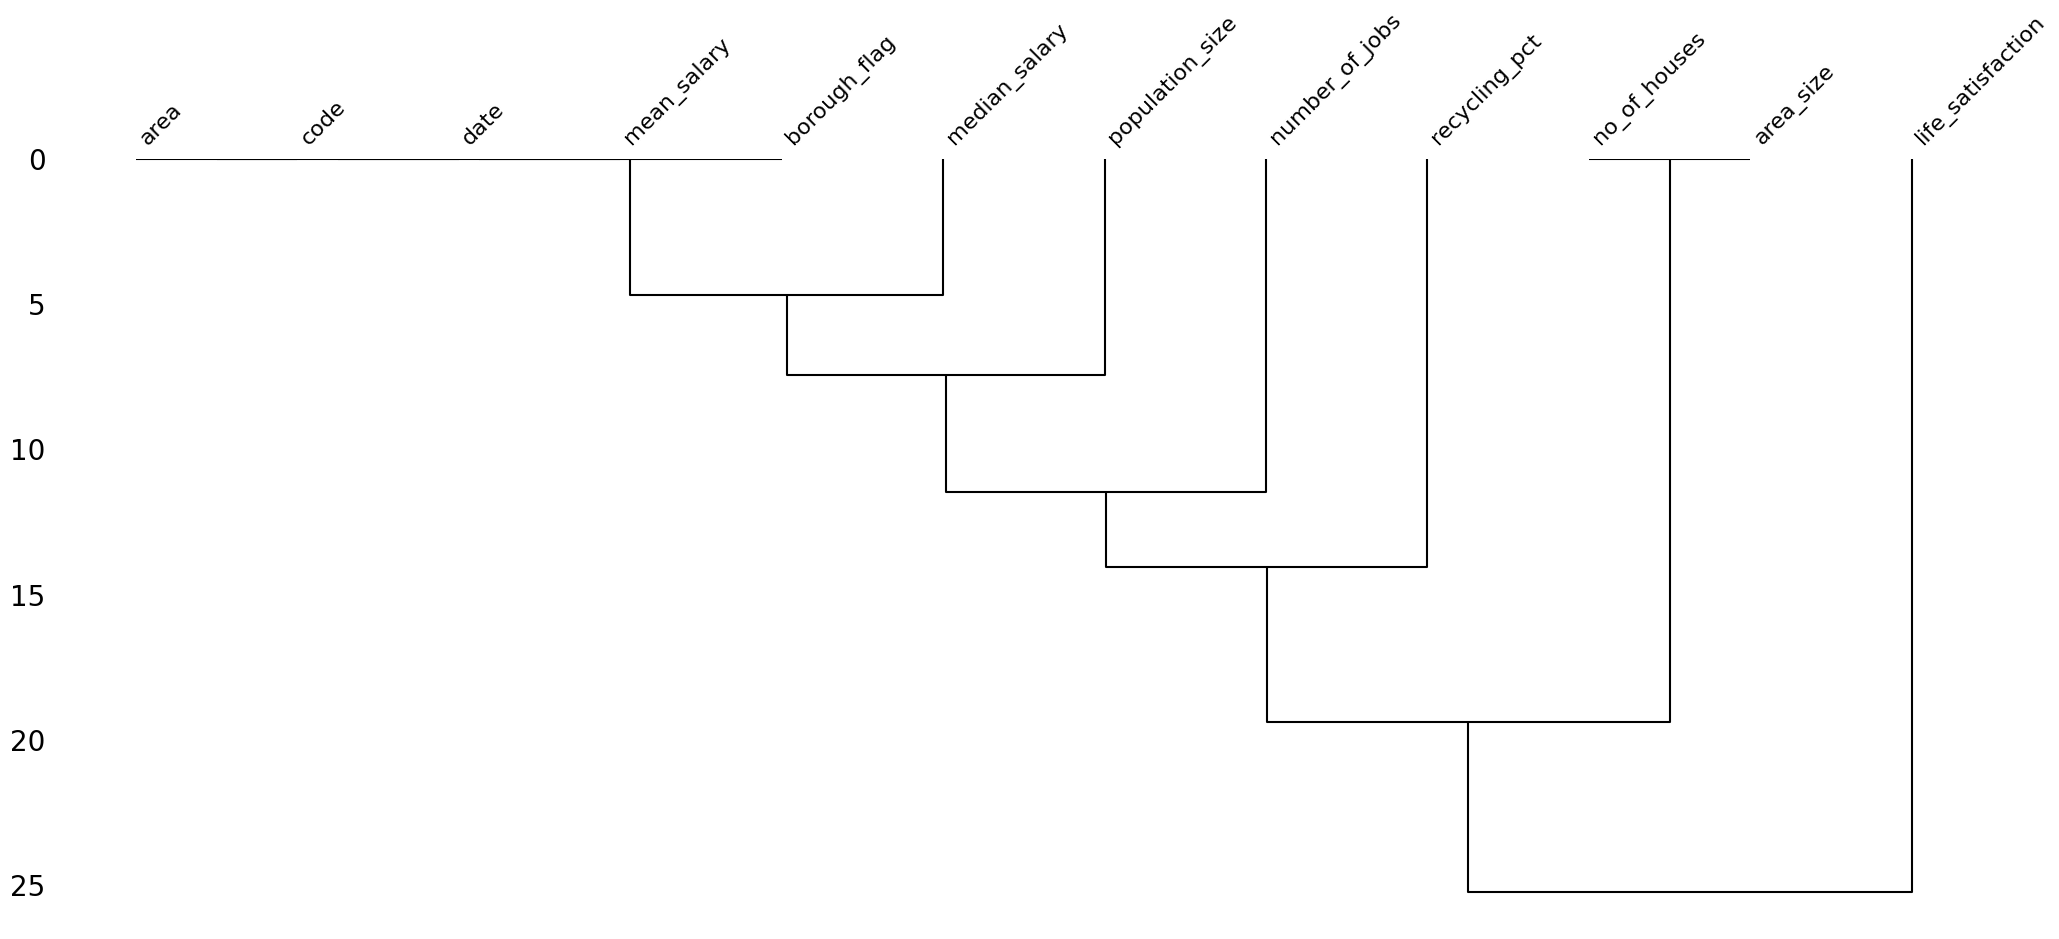

In [25]:
# Dendrogram of missing value patterns
plt.figure(figsize=(10, 5))
msno.dendrogram(df)
plt.show()


## **OBSERVATION**

We can observe that area, code, date, mean_salary, and borough_flag are clustered together and have no missing values.

Additionally, median_salary, population_size, number_of_jobs, and recycling_pct form a tightly clustered group (with low-height connections), suggesting that these columns are of the MAR (Missing At Random) type. Low-height connections indicate that these columns are strongly related in terms of missing values, pointing to MAR.

Similarly, no_of_houses and area_size are clustered at the 0 level, which suggests that these two columns are strongly related in terms of missing values and are likely MAR.

On the other hand, life_satisfaction exhibits high-height connections or sparse clustering, which suggests that the missing values are independent of other columns. This supports the MCAR (Missing Completely at Random) classification.